Task 1: Graphical method and absolute error.
Problem:
1. Plot the graph of the function f(x)=x^3−2x^2−5 in the range x∈[1,4].
2. Using the graph, find the approximate value of the root.
3. Calculate the value of f(x), where x is the found approximate value of the root.
4. Find the absolute error between the approximate value of the root and the true value (using any other
method for the exact solution).
Required:
1. Plot a graph.
2. Give a detailed calculation of the absolute error.
3. Explain why the graphical root search method is only approximate.


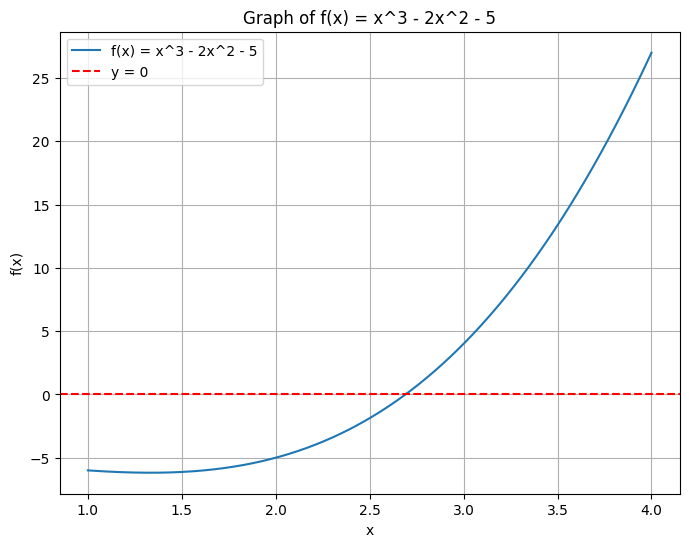

f(2.8) = 1.2719999999999967
Exact root: 2.690647448028614
Absolute error: 0.10935255197138583


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Function definition
def f(x):
    return x**3 - 2*x**2 - 5

# 1. Plotting the graph
x = np.linspace(1, 4, 500)  # Generating x values in the range [1, 4]
y = f(x)  # Evaluating f(x) for each x

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = x^3 - 2x^2 - 5")
plt.axhline(0, color='red', linestyle='--', label="y = 0")  # Horizontal line at y=0
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of f(x) = x^3 - 2x^2 - 5")
plt.legend()
plt.grid()
plt.show()

# 2. Using the graph, the root appears to be around x ≈ 2.8.

# 3. Calculate f(x) at the approximate root
approx_root = 2.8
f_approx = f(approx_root)
print(f"f({approx_root}) = {f_approx}")

# 4. Find the exact root using a numerical solver
true_root = fsolve(f, 2.8)[0]
absolute_error = abs(true_root - approx_root)
print(f"Exact root: {true_root}")
print(f"Absolute error: {absolute_error}")


Task 2: Comparison of root finding methods.
Problem:
1. Find the root of the equation f(x)=e^x−2x−3 in the interval [0,2] using the following methods:
- Bisection method.
- Secant method.
2. For each method, measure the number of iterations required to achieve an accuracy of 10^−6.
3. Calculate the relative error for both methods with respect to the exact value of the root.
Required:
1. Write functions for each method.
2. Print the number of iterations and the exact value of the root.
3. Explain which method is more efficient and why.

In [2]:
import numpy as np

# Function definition
def f(x):
    return np.exp(x) - 2*x - 3

# 1. Bisection Method
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2  # Midpoint
        if f(c) == 0 or (b - a) / 2 < tol:  # Found root or tolerance met
            break
        iterations += 1
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iterations

# 2. Secant Method
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    iterations = 0
    while abs(x1 - x0) > tol and iterations < max_iter:
        f0, f1 = f(x0), f(x1)
        x_new = x1 - f1 * (x1 - x0) / (f1 - f0)  # Secant formula
        x0, x1 = x1, x_new
        iterations += 1
    return x1, iterations

# Find root using Bisection
root_bisection, iter_bisection = bisection_method(f, 0, 2)
print(f"Bisection Method: Root = {root_bisection}, Iterations = {iter_bisection}")

# Find root using Secant
root_secant, iter_secant = secant_method(f, 0, 2)
print(f"Secant Method: Root = {root_secant}, Iterations = {iter_secant}")

# Relative errors (compare roots with high precision solution)
true_root = fsolve(f, 1)[0]
rel_error_bisection = abs((true_root - root_bisection) / true_root)
rel_error_secant = abs((true_root - root_secant) / true_root)

print(f"Relative error (Bisection): {rel_error_bisection}")
print(f"Relative error (Secant): {rel_error_secant}")


Bisection Method: Root = 1.9239368438720703, Iterations = 20
Secant Method: Root = 1.923938750346989, Iterations = 6
Relative error (Bisection): 9.909222981191876e-07
Relative error (Secant): 5.772881873891958e-13


Task 3: Newton-Raphson Method and Error Estimation.
Problem:
1. Using the Newton-Raphson method, find the root of the equation f(x)=x^2−3x+2, starting with the initial
guess x0=2.5.
2. Calculate the absolute and relative errors at each iteration step.
3. Plot a convergence graph, where the iteration number is plotted on the x-axis and the absolute error is
plotted on the y-axis.
Required:
1. Provide a table of iterations with the current guess, absolute and relative errors.
2. Explain how the choice of the initial guess affects the convergence of the method.

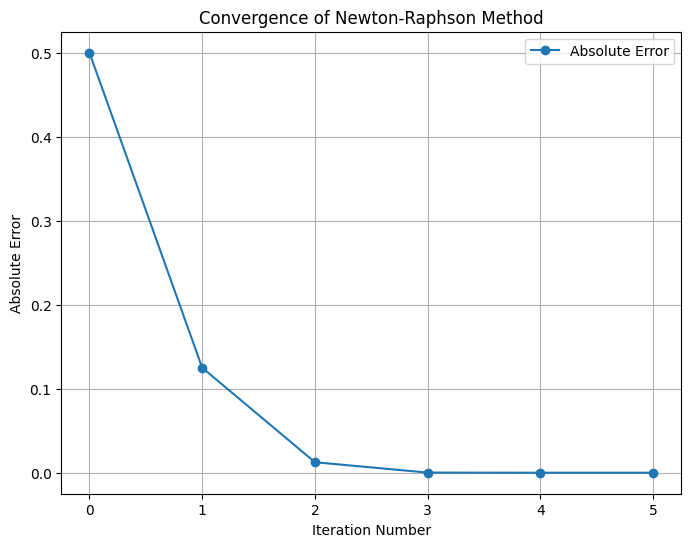

In [3]:
# Function and derivative definition
def f(x):
    return x**2 - 3*x + 2

def f_prime(x):
    return 2*x - 3

# Newton-Raphson Method
def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    x_values = [x0]  # List to store iteration values
    for i in range(max_iter):
        x_new = x0 - f(x0) / f_prime(x0)
        x_values.append(x_new)
        if abs(x_new - x0) < tol:
            break
        x0 = x_new
    return x_values

# Initial guess
x0 = 2.5
x_values = newton_raphson(f, f_prime, x0)

# Calculate errors
absolute_errors = [abs(x - x_values[-1]) for x in x_values]
relative_errors = [abs((x - x_values[-1]) / x_values[-1]) for x in x_values]

# Plot convergence graph
plt.figure(figsize=(8, 6))
plt.plot(range(len(absolute_errors)), absolute_errors, marker='o', label="Absolute Error")
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")
plt.title("Convergence of Newton-Raphson Method")
plt.legend()
plt.grid()
plt.show()


Task 4: Muller's Method and Complex Roots.
Problem:
1. Find one of the roots (including complex roots) for the function f(x)=x^3+x^2+x+1 using Muller's method,
starting with the initial approximations x0=-1, x1=0, x2=1.
2. Check the result by substituting the found root value into the function.
3. Calculate the absolute error between the calculated value of f(x) and 0.
Required:
1. Explain how Muller's method handles complex roots.
2. Provide an interpretation of the result.

In [4]:
import cmath

def mullers_method(f, x0, x1, x2, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        # Calculate function values
        f0, f1, f2 = f(x0), f(x1), f(x2)
        
        # Calculate differences
        h0, h1 = x1 - x0, x2 - x1
        d0 = (f1 - f0) / h0
        d1 = (f2 - f1) / h1
        a = (d1 - d0) / (h1 + h0)
        b = d1 + h1 * a
        c = f2
        
        # Discriminant
        discriminant = cmath.sqrt(b**2 - 4 * a * c)
        
        # Choose the denominator with larger magnitude
        if abs(b + discriminant) > abs(b - discriminant):
            denominator = b + discriminant
        else:
            denominator = b - discriminant
        
        # Handle small or zero denominator
        if abs(denominator) < 1e-12:  # Add a safeguard for near-zero denominators
            raise ValueError("Denominator too small; Muller's method failed to converge.")
        
        # Next approximation
        x3 = x2 - (2 * c) / denominator
        
        # Check for convergence
        if abs(x3 - x2) < tol:
            return x3, _  # Root found
        
        # Shift variables for next iteration
        x0, x1, x2 = x1, x2, x3
    
    raise ValueError("Muller's method did not converge within the maximum number of iterations.")

# Function to find the root for
def f(x):
    return x**3 + x**2 + x + 1

# Initial guesses
x0, x1, x2 = -1, 0, 1

# Find the root
try:
    root, iterations = mullers_method(f, x0, x1, x2)
    print(f"Root found using Muller's method: {root}")
    print(f"Iterations: {iterations}")
    print(f"f(root): {f(root)}")
except ValueError as e:
    print(e)



Denominator too small; Muller's method failed to converge.


Task 5: Error estimation when using False position method.
Problem:
1. Find the root of the equation f(x)=x^2−2^x using the False position method.
2. Calculate the absolute and relative errors after each iteration.
3. Plot a graph of the absolute error as a function of the iteration number.
Required:
1. Explain why the false position method converges more slowly than the Newton-Raphson method.

Root found using False Position method: 2.0


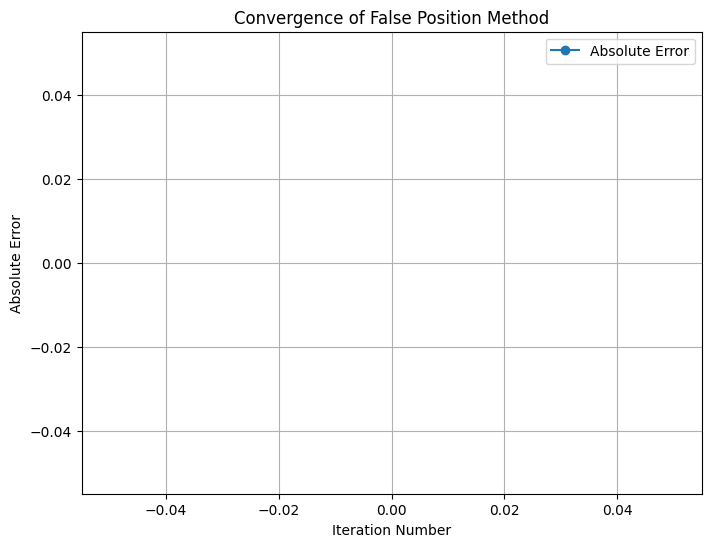

In [5]:
# False Position Method
def false_position_method(f, a, b, tol=1e-6, max_iter=100):
    errors = []
    for i in range(max_iter):
        c = a - (f(a) * (b - a)) / (f(b) - f(a))  # False position formula
        if f(c) == 0 or abs(f(c)) < tol:  # Root found or tolerance met
            break
        errors.append(abs(f(c)))
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, errors

# Define the function
def f(x):
    return x**2 - 2**x

# Find the root and track errors
root, errors = false_position_method(f, 0, 2)
print(f"Root found using False Position method: {root}")

# Plot absolute error vs iteration number
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o', label="Absolute Error")
plt.xlabel("Iteration Number")
plt.ylabel("Absolute Error")
plt.title("Convergence of False Position Method")
plt.legend()
plt.grid()
plt.show()


Task 6: Iteration method and errors.
Problem:
1. Solve the equation f(x)=x^2−6x+5 using the iteration method. Transform the equation into the form x=g(x).
2. Perform 10 iterations, starting with the initial value x0=0.5.
3. Find the absolute error at each iteration, comparing the result with the true root.

In [6]:
# Function for iteration
def g(x):
    return (6*x - 5)**0.5

# Iteration Method
def iteration_method(g, x0, true_root, num_iter=10):
    x = x0
    results = []
    for i in range(num_iter):
        x_new = g(x)
        abs_error = abs(x_new - true_root)
        results.append((i + 1, x_new, abs_error))
        x = x_new
    return results

# True root for comparison
true_root = 1  # (Solve x^2 - 6x + 5 = 0)

# Initial guess
x0 = 0.5
iterations = iteration_method(g, x0, true_root)

# Display results
print("Iteration | Approximation | Absolute Error")
for iteration, approximation, abs_error in iterations:
    print(f"{iteration:9} | {approximation:14.6f} | {abs_error:14.6f}")


Iteration | Approximation | Absolute Error
        1 | 0.000000+1.414214j |       1.732051
        2 | 1.557058+2.724781j |       2.781140
        3 | 3.260206+2.507308j |       3.375667
        4 | 4.212955+1.785428j |       3.675708
        5 | 4.648184+1.152339j |       3.825850
        6 | 4.837337+0.714653j |       3.903317
        7 | 4.920758+0.435697j |       3.944892
        8 | 4.959235+0.263567j |       3.967998
        9 | 4.978016+0.158839j |       3.981186
       10 | 4.987707+0.095538j |       3.988851
